## Pandas Advanced Practice and Exercises

### 1. 데이터 프레임 생성

- 복잡한 데이터 프레임 구조 이해

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 1 생성 (다중 인덱스 포함)
df_1 = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture'],
    'Sub-Category': ['Phone', 'Laptop', 'Chair', 'Table'],
    'Sales': [200, 300, 150, 400],
    'Profit': [20, 50, 15, 40]
}).set_index(['Category', 'Sub-Category'])

# 데이터프레임 2 생성 (새로운 인덱스와 열)
df_2 = pd.DataFrame({
    'Category': ['Electronics', 'Furniture', 'Furniture', 'Appliances'],
    'Discount': [10, 15, 20, 5],
    'Rating': [4.5, 4.0, 3.5, 4.8]
}).set_index('Category')

print(f"DataFrame 1 (Multi-Index):\n {df_1}")
print(f"\nDataFrame 2:\n {df_2}")

DataFrame 1 (Multi-Index):
                           Sales  Profit
Category    Sub-Category               
Electronics Phone           200      20
            Laptop          300      50
Furniture   Chair           150      15
            Table           400      40

DataFrame 2:
              Discount  Rating
Category                     
Electronics        10     4.5
Furniture          15     4.0
Furniture          20     3.5
Appliances          5     4.8


### 2. 다중 인덱스 병합

- merge()를 사용하여 다중 인덱스를 포함한 데이터 병합

In [2]:
# 병합: Category 를 기준으로 병합
merged_df = df_1.reset_index().merge(df_2.reset_index(), on='Category', how='left')
merged_df.set_index(['Category', 'Sub-Category'], inplace=True)

print(f"\nMerged DataFrame (Multi-Index):\n {merged_df}")


Merged DataFrame (Multi-Index):
                           Sales  Profit  Discount  Rating
Category    Sub-Category                                 
Electronics Phone           200      20        10     4.5
            Laptop          300      50        10     4.5
Furniture   Chair           150      15        15     4.0
            Chair           150      15        20     3.5
            Table           400      40        15     4.0
            Table           400      40        20     3.5


### 결손값 처리

- 결손값을 열별로 다르게 처리

In [3]:
# 결손값 처리: 열별로 다른 값으로 대체
merged_df['Discount'] = merged_df['Discount'].fillna(0) # 결손값을 0으로 채움
merged_df['Rating'] = merged_df['Rating'].fillna(merged_df['Rating'].mean())    # 평균값으로 채움

print(f"\nDataFrame after Filling Missing Values:\n {merged_df}")


DataFrame after Filling Missing Values:
                           Sales  Profit  Discount  Rating
Category    Sub-Category                                 
Electronics Phone           200      20        10     4.5
            Laptop          300      50        10     4.5
Furniture   Chair           150      15        15     4.0
            Chair           150      15        20     3.5
            Table           400      40        15     4.0
            Table           400      40        20     3.5


### 사용자 정의 함수로 새로운 열 생성

- apply()를 활용하여 조건 기반 열 생성

In [4]:
# 새로운 열: 높은 판매량 기준으로 등급 부여
def assing_sales_grade(sales):
    if sales > 250:
        return 'High'
    elif sales > 100:
        return 'Medium'
    else:
        return 'Low'

merged_df['Sales Grade'] = merged_df['Sales'].apply(assing_sales_grade)
print(f"DataFrame with Sales Grade:\n {merged_df}")

DataFrame with Sales Grade:
                           Sales  Profit  Discount  Rating Sales Grade
Category    Sub-Category                                             
Electronics Phone           200      20        10     4.5      Medium
            Laptop          300      50        10     4.5        High
Furniture   Chair           150      15        15     4.0      Medium
            Chair           150      15        20     3.5      Medium
            Table           400      40        15     4.0        High
            Table           400      40        20     3.5        High


### 5. 그룹화 및 다중 통계 연산

- groupby()와 agg()로 다중 통계 연산 수행

In [5]:
# 그룹화 및 다중 통계 연산
grouped_stats = merged_df.groupby('Category').agg({
    'Sales': ['mean', 'sum', 'max'],
    'Profit': ['mean', 'sum'],
    'Rating': 'mean'
})

print(f"\nGrouped Statistics:\n {grouped_stats}")


Grouped Statistics:
              Sales            Profit      Rating
              mean   sum  max   mean  sum   mean
Category                                        
Electronics  250.0   500  300   35.0   70   4.50
Furniture    275.0  1100  400   27.5  110   3.75


### 6. 피벗 테이블과 정렬

- 피벗 테이블 생성 후 특정 기준으로 정렬

In [7]:
# 피벗 테이블 생성
pivot_df = merged_df.reset_index().pivot_table(
    index='Category', columns='Sub-Category', values='Sales', aggfunc='sum'
)

# 정렬
pivot_sorted = pivot_df.sort_values(by='Phone', ascending=False)
print(f"\nPivot Table (Sorted):\n{pivot_sorted}")


Pivot Table (Sorted):
Sub-Category  Chair  Laptop  Phone  Table
Category                                 
Electronics     NaN   300.0  200.0    NaN
Furniture     300.0     NaN    NaN  800.0


### 7. 시각화

- 피벗 테이블을 시각화하여 데이터 비교

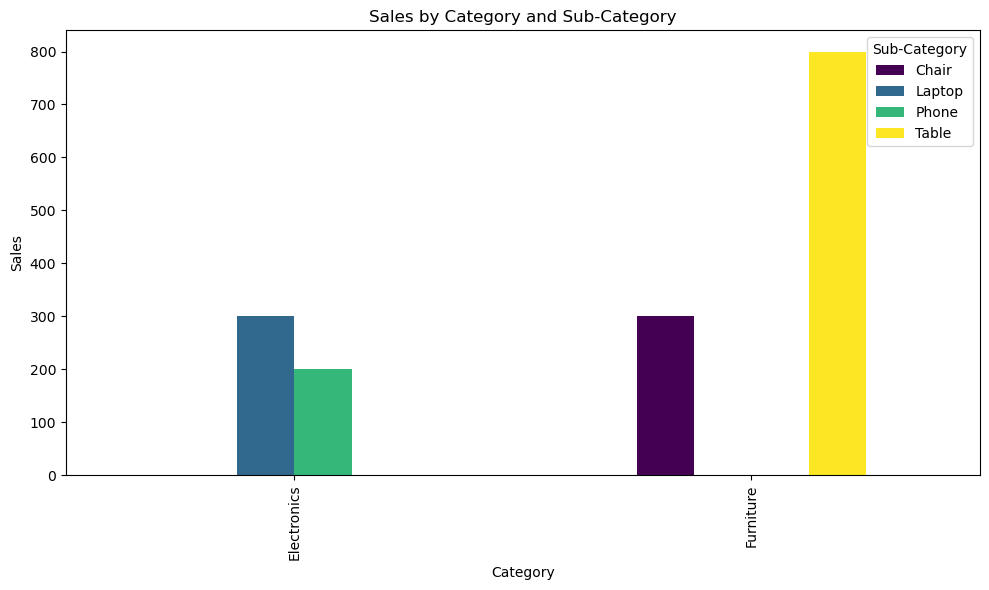

In [8]:
# 피벗 테이블 시각화
pivot_sorted.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Sales by Category and Sub-Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.legend(title='Sub-Category')
plt.tight_layout()
plt.show()

### 8. 데이터 저장 및 불러오기

- 병합된 데이터프레임을 저장하고 다시 불러오기

In [9]:
# 데이터 저장
merged_df.to_csv('merged_data.csv', encoding='utf-8-sig')
print(f"\nMerged DataFrame saved to 'merged_data.csv'.")

# 데이터 불러오기
loaded_df = pd.read_csv('merged_data.csv', index_col=[0, 1])
print(f"\nLoaded DataFrame:\n{loaded_df}")


Merged DataFrame saved to 'merged_data.csv'.

Loaded DataFrame:
                          Sales  Profit  Discount  Rating Sales Grade
Category    Sub-Category                                             
Electronics Phone           200      20        10     4.5      Medium
            Laptop          300      50        10     4.5        High
Furniture   Chair           150      15        15     4.0      Medium
            Chair           150      15        20     3.5      Medium
            Table           400      40        15     4.0        High
            Table           400      40        20     3.5        High


### 9. 필터링 실습

- 단일 조건, 다중 조건, 쿼리 기반 필터링, 텍스트 조건 필터링, 정규식 필터링 실습

Original DataFrame:
      Category Sub-Category  Sales  Profit  Discount  Rating
0  Electronics        Phone    200      20        10     4.5
1  Electronics       Laptop    300      50         5     4.0
2    Furniture        Chair    150      15        15     3.5
3    Furniture        Table    400      40        20     4.8
4  Electronics      Monitor    250      30         0     3.8
5    Furniture        Shelf    100      10        25     4.2

Filtered DataFrame (Single Condition - Sales >= 200):
      Category Sub-Category  Sales  Profit  Discount  Rating
0  Electronics        Phone    200      20        10     4.5
1  Electronics       Laptop    300      50         5     4.0
3    Furniture        Table    400      40        20     4.8
4  Electronics      Monitor    250      30         0     3.8

Filtered DataFrame (Multiple Conditions - Sales >= 200 and Profit >= 30):
      Category Sub-Category  Sales  Profit  Discount  Rating
1  Electronics       Laptop    300      50         5     

/var/folders/29/tlprn8x91jj699x63x_yrfwh0000gn/T/ipykernel_6051/4074399220.py:27: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_regex = df[df['Sub-Category'].str.contains(r"(Phone|Laptop)$", na=False, regex=True)]


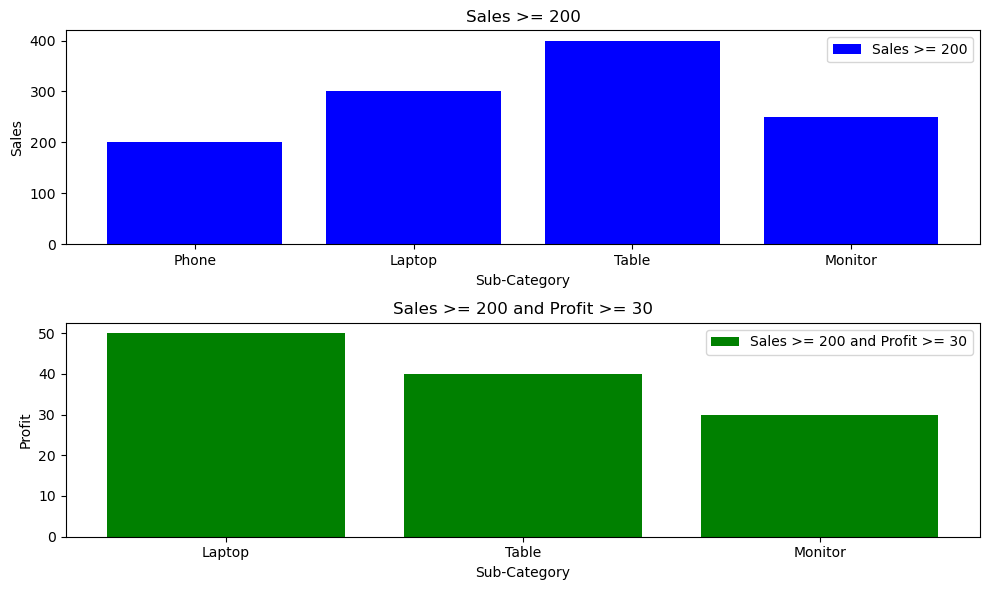

In [ ]:
# 샘플 데이터 프레임 생성
data = {
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture', 'Electronics', 'Furniture'],
    'Sub-Category': ['Phone', 'Laptop', 'Chair', 'Table', 'Monitor', 'Shelf'],
    'Sales': [200, 300, 150, 400, 250, 100],
    'Profit': [20, 50, 15, 40, 30, 10],
    'Discount': [10, 5, 15, 20, 0, 25],
    'Rating': [4.5, 4.0, 3.5, 4.8, 3.8, 4.2]
}
df = pd.DataFrame(data)

print(f"Original DataFrame:\n{df}")

# 1. 단일 조건 필터링
filtered_single = df[df['Sales'] >= 200]

# 2. 다중 조건 필터링
filtered_multiple = df[(df['Sales'] >= 200) & (df['Profit'] >= 30)]

# 3. 쿼리 기반 필터링
filtered_query = df.query("Category == 'Electronics' and Sales >= 200")

# 4. 텍스트 조건 필터링
filtered_text = df[df['Sub-Category'].str.contains("Phone", na=False)]

# 5. 정규식 기반 필터링
filtered_regex = df[df['Sub-Category'].str.contains(r"(Phone|Laptop)$", na=False, regex=True)]

# 모든 필터링 결과를 출력
print(f"\nFiltered DataFrame (Single Condition - Sales >= 200):\n{filtered_single}")
print(f"\nFiltered DataFrame (Multiple Conditions - Sales >= 200 and Profit >= 30):\n{filtered_multiple}")
print(f"\nFiltered DataFrame (Query-Based - Electronics and Sales >= 200):\n{filtered_query}")
print(f"\nFiltered DataFrame (Text Contains 'Phone'):\n{filtered_text}")
print(f"\nFiltered DataFrame (Regex = 'Phone' or 'Laptop'):\n{filtered_regex}")

# 필터링 결과를 시각화
plt.figure(figsize=(10, 6))

# 단일 조건 필터링 시각화
plt.subplot(2, 1, 1)
plt.bar(filtered_single['Sub-Category'], filtered_single['Sales'], color='blue', label='Sales >= 200')
plt.title("Sales >= 200")
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.legend()

# 다중 조건 필터링 시각화
plt.subplot(2, 1, 2)
plt.bar(filtered_multiple['Sub-Category'], filtered_multiple['Profit'], color='green', label='Sales >= 200 and Profit >= 30')
plt.title('Sales >= 200 and Profit >= 30')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.legend()

plt.tight_layout()
plt.show()